### Jesus Ponte
### 23002672
### Proyecto final Statistical Learning II
## Clasificación de granos de café 

Objetivo: Crear un modelo basado en CNN que permita calificar los tipos de tostado de café.

Las empresas que realizan el tostado del café deben estar constantemente monitoreando 
el grado de tostado de los granos del café. Al utilizar una solución de AI puede ayudar
a lograr un nivel de observación mayor durante el proceso de tostado. 

Por otro lado, los baristas y amantes del café tambien buscan asegurarse que la calidad del café
y el tostado mantenga uniformidad ya que puede variar el sabor al momento de procesarlo.

Nuestro dataset está compuesto por una selección de cuatro categorias de café por cada tipo de tostado.
Grano oscuro: notas a chocolate oscuro, mucha textura.
Medio: balance entre acidez, dulzor y aromas.
Claro: acidez pronunciada, taza limpia, predominan sabores del origen.
Verde: Crudo. 


## Importacion de librerias en general

In [85]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [86]:
import pathlib

In [87]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

## Capetas que contienen las imagenes a utilizar divididas en train y test

In [88]:
training_folder = 'coffeebeansdataset/train'
testing_folder = 'coffeebeansdataset/test'

In [89]:
data = tf.keras.utils.image_dataset_from_directory(training_folder)

Found 1200 files belonging to 4 classes.


## Visualización de imagenes random dentro del dataset

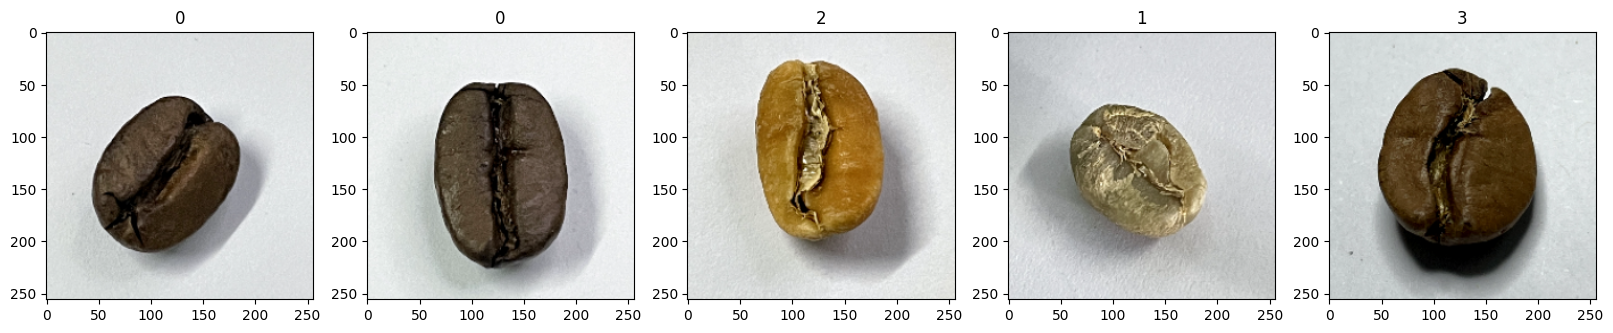

In [90]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


## Visualizacion de tipos de granos

## Grano oscuro

(224, 224, 3)

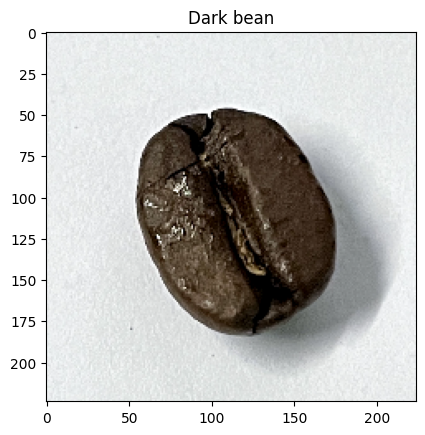

In [91]:
img = mpimg.imread('coffeebeansdataset/train/Dark/dark (30).png')
plt.imshow(img)
plt.title('Dark bean')
img.shape

## Grano Verde

(224, 224, 3)

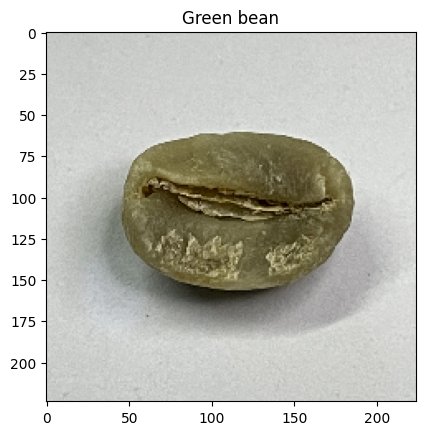

In [92]:
img = mpimg.imread('coffeebeansdataset/train/Green/green (6).png')
plt.imshow(img)
plt.title('Green bean')
img.shape

## Grano claro

(224, 224, 3)

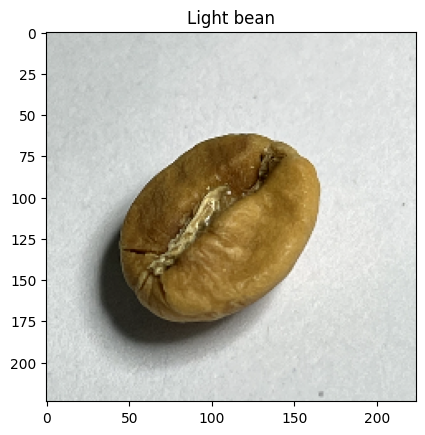

In [93]:
img = mpimg.imread('coffeebeansdataset/train/Light/light (5).png')
plt.imshow(img)
plt.title('Light bean')
img.shape

## Grano medio

(224, 224, 3)

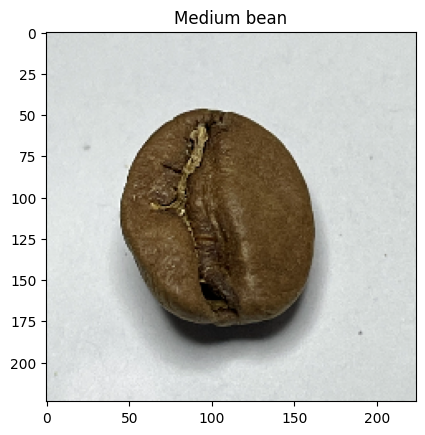

In [94]:
img = mpimg.imread('coffeebeansdataset/train/Medium/medium (14).png')
plt.imshow(img)
plt.title('Medium bean')
img.shape

## Configuración de los parametros para el modelo

In [95]:
batch_size = 32
img_height = 224
img_width = 224

data_dir = pathlib.Path('coffeebeansdataset/train')
data_dir_2 = pathlib.Path('coffeebeansdataset/test')


## Separación del modelo train

In [96]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1200 files belonging to 4 classes.


## Separación del modelo test

In [97]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_2,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 400 files belonging to 4 classes.


### Confirmación de las categorias

In [98]:
class_names = train_ds.class_names
print(class_names)

['Dark', 'Green', 'Light', 'Medium']


### Estructura de las imagenes


In [99]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


### Normalizacion de las imagenes


In [100]:
normalization_layer = tf.keras.layers.Rescaling(1./255)         ## canal rgb                                                                            

In [101]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


## Creación del modelo

Se usaron tres capas Conv2D, y cada una de ellas utiliza 32 filtros, con kernel de 3x3 y aplica la función ReLU a la salida de la convolución 
y se utiliza para introducir no linealidad en la red neuronal.
Se escogieron 32 filtros ya que es un número sencillo y efectivo para la detección de caracteristicas en imagenes.
Se usaron 3 capas de filtros 

La capa flatten se utiliza para convertir la salida de las capas de convolución en un vector unidimensional.
Se crea una capa densa completamente conectada. 
Una capa de salida de 4 categorias.


In [102]:
labels = 4

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(labels)
])


### Se hace la compilación del modelo, con Adam como optimizador, SparseCategoricalCrossentropy para clasificacion multiple y como metricas el accuracy.

In [103]:
model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [104]:
result = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)

Epoch 1/5
38/38 [==============================] - 21s 548ms/step - loss: 1.2908 - accuracy: 0.4900 - val_loss: 0.6386 - val_accuracy: 0.6825
Epoch 2/5
38/38 [==============================] - 20s 520ms/step - loss: 0.4470 - accuracy: 0.8292 - val_loss: 0.3829 - val_accuracy: 0.8425
Epoch 3/5
38/38 [==============================] - 19s 508ms/step - loss: 0.2274 - accuracy: 0.9058 - val_loss: 0.2036 - val_accuracy: 0.9125
Epoch 4/5
38/38 [==============================] - 19s 505ms/step - loss: 0.0944 - accuracy: 0.9692 - val_loss: 0.0507 - val_accuracy: 0.9775
Epoch 5/5
38/38 [==============================] - 20s 515ms/step - loss: 0.0691 - accuracy: 0.9708 - val_loss: 0.0498 - val_accuracy: 0.9775


In [105]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 32)       

## Visualización del accuracy por epochs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


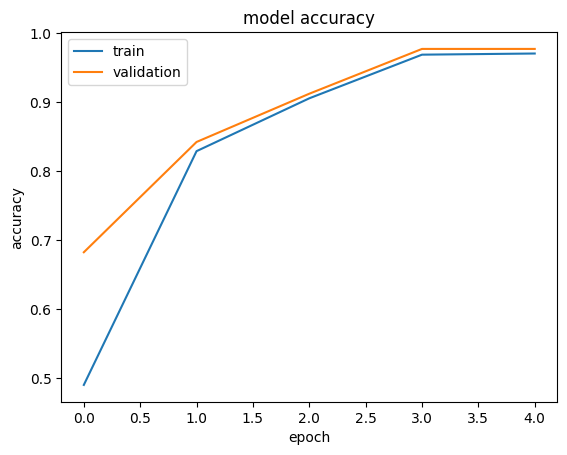

In [106]:
print(result.history.keys())
plt.figure(1)
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')